In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)
(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)
Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)


'\nThe test result show that there is no sigificant difference in the average trust\nin 2014 to 2016.\n'

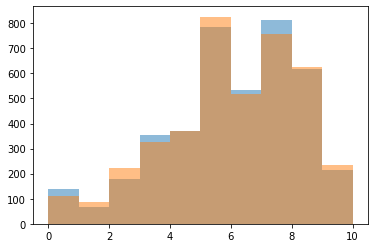

In [26]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

data_2014 = data[data['year'] == 6]
data_2016 = data[data['year'] == 7]

#Did people become less trusting from 2012 to 2014?

#First test if bothd data sets are normal
plt.hist(data_2014['ppltrst'], alpha = .5)
plt.hist(data_2016['ppltrst'], alpha = .5)

print(stats.describe(data_2014['ppltrst']))
print(stats.describe(data_2016['ppltrst']))

print(stats.shapiro(data_2014['ppltrst']))
print(stats.shapiro(data_2016['ppltrst']))
#it has been shown that both data sets are normal, the standard ttest can be 
#used

print(stats.ttest_ind(data_2014['ppltrst'], data_2016['ppltrst']))
'''
The test result show that there is no sigificant difference in the average trust
in 2014 to 2016. Failed to reject the null hypothesis
'''



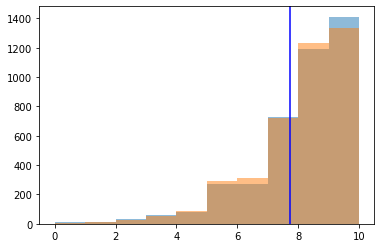

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)
KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)


In [35]:
#Did people become happier from 2014 to 2016?

#Show that the data is normal
plt.hist(data_2014['happy'], alpha = .5)
plt.hist(data_2016['happy'], alpha = .5)
plt.axvline(data_2014['happy'].mean(), color = 'blue')
plt.show()

print(stats.describe(data_2014['happy']))
print(stats.describe(data_2016['happy']))
#Not normally distributed

print(stats.kruskal(data_2014['happy'], data_2016['happy']))

'''
Based on p value we fail to reject null hypothesis.

KruskalResult(statistic=8.421193816868088, pvalue=0.01483750905996286)


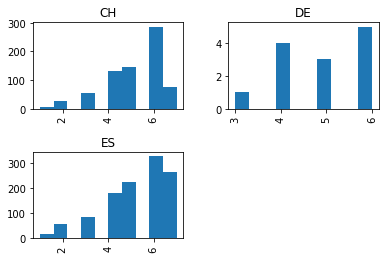

In [75]:
data_2014['cntry'].unique()
filter_list = ['CH', 'DE', 'ES']
data_2014_ch_de_es = data_2014[data_2014['cntry'].isin(filter_list)]

data_2014_ch_de_es['sclmeet'].hist(by = data_2014_ch_de_es['cntry'])
data_2014_ch = data_2014[data_2014['cntry'] == 'CH']
data_2014_de = data_2014[data_2014['cntry'] == 'DE']
data_2014_es = data_2014[data_2014['cntry'] == 'ES']
print(stats.kruskal(data_2014_ch['sclmeet'], data_2014_ch['sclmeet'], data_2014_es['sclmeet']))

'''
Bases on the kruskal test we can reject the null hypothesis and confirm that there
is a significant difference between these countries

F_onewayResult(statistic=30.380899763629348, pvalue=9.716316094843513e-14)


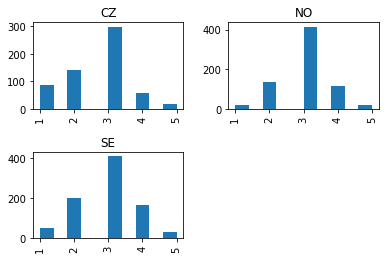

In [88]:
data_2014['cntry'].unique()
filter_list_2 = ['NO', 'SE', 'CZ']
data_2014_no_se_cz = data_2014[data_2014['cntry'].isin(filter_list_2)]
data_2014_no_se_cz['sclact'].hist(by = data_2014_no_se_cz['cntry'])

data_2014_no = data_2014[data_2014['cntry'] == 'NO']
data_2014_se = data_2014[data_2014['cntry'] == 'SE']
data_2014_cz = data_2014[data_2014['cntry'] == 'CZ']

print(stats.f_oneway(data_2014_no['sclact'], data_2014_se['sclact'], data_2014_cz['sclact']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB
Ttest_indResult(statistic=5.172289431795646, pvalue=2.4021740879907784e-07)


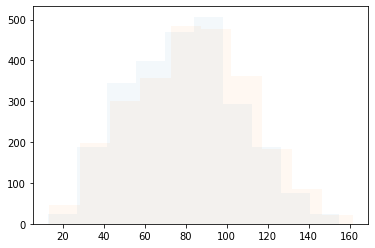

In [95]:
rfft = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')
rfft.info()
rfft.head()

pivot = rfft.pivot(index = 'Casenr', columns = 'Measurement', values = 'Unique')
pivot.head()

plt.hist(pivot['Measurement 2 (2006-2008)'], alpha =.05)
plt.hist(pivot['Measurement 3 (2008-2012)'], alpha = .05)

print(stats.ttest_ind(pivot['Measurement 3 (2008-2012)'], pivot['Measurement 2 (2006-2008)']))